# **1. Case Study: Applied Classification**
<img src='https://i.imgur.com/lqISt1S.jpeg'>

## **1.1 Business Case Understanding**
<img src="https://i.ibb.co/7X0RfYP/Screenshot-from-2021-10-15-19-42-02.png">

## **1.2 Review classification algorithm K-Nearest Neighbor**
<img src='https://i.ibb.co/Hd1k87W/Screenshot-from-2021-10-10-20-17-29.png'><br><br>
<img src='https://i.ibb.co/N3SY61w/Screenshot-from-2021-10-10-20-17-56.png'><br><br>
<img src='https://i.ibb.co/7G7kM9R/Screenshot-from-2021-10-10-20-18-11.png'><br><br>
<img src='https://i.ibb.co/JKTCjPW/Screenshot-from-2021-10-10-20-18-26.png'>

## **1.3 Dataset Exploration**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv

# language tooling
from nltk import download
from nltk.corpus import stopwords
from wordcloud import WordCloud

# machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [ ]:
data_sentimen = read_csv(
    "https://raw.githubusercontent.com/radya13rahman/Sentiment_Analysis_Sekolah_Daring/master/Dataset/datatest.csv",
    sep=';')

data_sentimen.head()

,tweet,sentiment
0,kuota boros sekolah tidak subsidi kuota,negative
1,males banget sekolah online,negative
2,asik nonton netflix sekolah online indihome mati,negative
3,bebel sekolah online,negative
4,sekolah online bajingan,negative


In [ ]:
data_sentimen

,tweet,sentiment
0,kuota boros sekolah tidak subsidi kuota,negative
1,males banget sekolah online,negative
2,asik nonton netflix sekolah online indihome mati,negative
3,bebel sekolah online,negative
4,sekolah online bajingan,negative
...,...,...
295,selama sekolah online gua makin rajin nih,positive
296,minggu awal sekolah online seru banget aku raj...,positive
297,gua awalnya ambis banget rajin sekolah online,positive
298,keponakan yang rajin dan pinter atur sekolah o...,positive


In [ ]:
data_sentimen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      300 non-null    object
 1   sentiment  300 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [ ]:
# stopwords init
download('stopwords')

stop = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data_sentimen.tweet

0                kuota boros sekolah tidak subsidi kuota
1                            males banget sekolah online
2       asik nonton netflix sekolah online indihome mati
3                                   bebel sekolah online
4                                sekolah online bajingan
                             ...                        
295            selama sekolah online gua makin rajin nih
296    minggu awal sekolah online seru banget aku raj...
297        gua awalnya ambis banget rajin sekolah online
298    keponakan yang rajin dan pinter atur sekolah o...
299    selama ini lihat adek sekolah online biasa mas...
Name: tweet, Length: 300, dtype: object

In [ ]:
stop.extend(['yg', 'aja', 'sih'])

In [ ]:
# Mengubah huruf besar jadi kecil pada kalimat
data_sentimen['tweet'] = data_sentimen['tweet'].str.lower()

# Hilangkan stopwords pada data
data_sentimen['tweet'] = data_sentimen['tweet'].apply(
    lambda x: ' '.join([word for word in x.split()
    if word not in (stop)]))

In [ ]:
data_sentimen

,tweet,sentiment
0,kuota boros sekolah subsidi kuota,negative
1,males banget sekolah online,negative
2,asik nonton netflix sekolah online indihome mati,negative
3,bebel sekolah online,negative
4,sekolah online bajingan,negative
...,...,...
295,sekolah online gua rajin nih,positive
296,minggu sekolah online seru banget rajin mencat...,positive
297,gua ambis banget rajin sekolah online,positive
298,keponakan rajin pinter atur sekolah online,positive


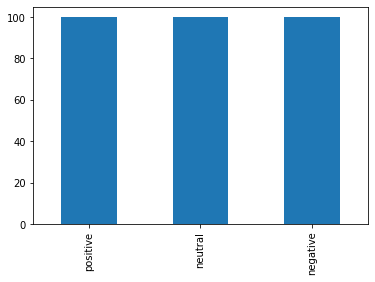

In [ ]:
data_sentimen['sentiment'].value_counts().plot(kind='bar')

In [ ]:
data_sentimen[data_sentimen['sentiment'] == 'neutral']

,tweet,sentiment
100,capek ga sekolah online bingung,neutral
101,sekolah online,neutral
102,sekolah online ga nih bingung,neutral
103,sekolah online offline efektif,neutral
104,jadwal sekolah online enak kangen offline,neutral
...,...,...
195,sekolah online ngeselin offline bosen,neutral
196,materi diajarin gamasuk emang kayak gitu,neutral
197,sekolah online enak kadang bosen,neutral
198,sekolah online kadang bikin capek kadang,neutral


In [ ]:
kumpulan_kata = ' '.join([str(twt) for twt in
                        data_sentimen['tweet']])

kumpulan_kata

'kuota boros sekolah subsidi kuota males banget sekolah online asik nonton netflix sekolah online indihome mati bebel sekolah online sekolah online bajingan bolos sekolah online benci sekolah gasuka metode ajar online ga semangat sekolah online gasuka sekolah online gila sekolah online guru lelah guru ku gantung sekolah sekolah ku online resiko harga jatuh semenjak sekolah online akibat contek melulu sekolah online kayak ngelunjak bocah jamet iri lihat sekolah online pinter kabur sekolah online males sekolah online tidur ngerasanya sekolah online lelah ngrasa capek banget gas sekolah daring gini persetan sekolah online pilih sekolah online ayo sekolah offline butuh uang jajan biar nabung dah muak sekolah online gakuat sekolah online paham materi nyerah sekolah online capek gara gara sekolah online guru pusing ngajar pas sekolah online murid paham orang tua murid ngeluh sekolah daring tolol sekolah materi tugas imbang pas daring engga imbang tugas materi sekolah online capek stress ngel

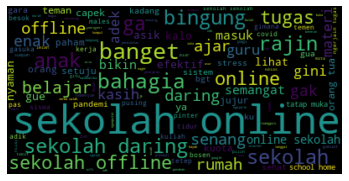

In [ ]:
word_cloud = WordCloud(
    max_font_size=400).generate(kumpulan_kata)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **1.4 Model Building**

In [ ]:
document = [
  "One Geek helps Two Geeks",
  "Two Geeks help Four Geeks",
  "Each Geek helps many other Geeks at GeeksforGeeks"]

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200706061418/table.PNG"><br><br>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200706062006/table2.PNG">

In [ ]:
cvec = CountVectorizer()

In [ ]:
cvec.fit(document)

# Cetak kata2 yang unik
print(cvec.vocabulary_)

{'one': 9, 'geek': 3, 'helps': 7, 'two': 11, 'geeks': 4, 'help': 6, 'four': 2, 'each': 1, 'many': 8, 'other': 10, 'at': 0, 'geeksforgeeks': 5}


In [ ]:
vector = cvec.transform(document)

print(vector.toarray())

[[0 0 0 1 1 0 0 1 0 1 0 1]
 [0 0 1 0 2 0 1 0 0 0 0 1]
 [1 1 0 1 1 1 0 1 1 0 1 0]]


In [ ]:
# Pisah data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(
    data_sentimen.tweet,
    data_sentimen.sentiment,
    test_size=0.3)

In [ ]:
clf = KNeighborsClassifier()

In [ ]:
model = Pipeline(
    [('vectorizer', cvec),
     ('classifier', clf)])

In [ ]:
# Proses training
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=Fa

In [ ]:
hasil_prediksi = model.predict(x_test)

In [ ]:
hasil_prediksi

array(['neutral', 'negative', 'negative', 'negative', 'negative',
       'neutral', 'positive', 'positive', 'negative', 'negative',
       'neutral', 'negative', 'negative', 'positive', 'negative',
       'neutral', 'negative', 'neutral', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'neutral',
       'negative', 'positive', 'neutral', 'negative', 'positive',
       'negative', 'negative', 'positive', 'negative', 'negative',
  

## **1.5 Model Testing & Evaluation**

<img src="https://1.bp.blogspot.com/-ieWkJFWBEPU/X6VGwubpKFI/AAAAAAAACR4/DUPNT4UL5AEPo3E2iEtoR9geg0oEeZwmwCLcBGAsYHQ/w1200-h630-p-k-no-nu/Confusion%2BMatrix%2BTabel.jpg">

Presisi merupakan prediksi rasio ​ TP ​ dibanding keseluruhan prediksi positif.<br>
Presisi = ​ TP / (TP+FP)<br><br>
Recall ​ adalah prediksi rasio ​ TP ​ dibanding keseluruhan data yang benar.<br>
Recall ​ = ​ TP / (TP+FN)<br><br>
F1-score ​ adalah perbandingan sebuah rata-rata presisi dan recall.<br> ​
F1 ​ - ​ score ​ = ​ 2 x (recall x presisi) / (recall + presisi)<br><br>
Akurasi adalah hasil prediksi yang benar dari seluruh data uji.<br>
Akurasi = ​ TP + TN / (TP+FP+FN+TN)

In [ ]:
print(classification_report(y_test, hasil_prediksi))

              precision    recall  f1-score   support

    negative       0.51      0.97      0.67        32
     neutral       1.00      0.29      0.44        28
    positive       0.86      0.60      0.71        30

    accuracy                           0.63        90
   macro avg       0.79      0.62      0.61        90
weighted avg       0.78      0.63      0.61        90



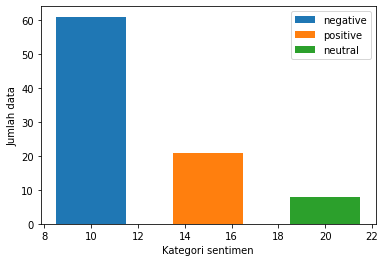

In [ ]:
plt.bar(10, len(np.where(hasil_prediksi == 'negative')[0]), 3, label='negative')
plt.bar(15, len(np.where(hasil_prediksi == 'positive')[0]), 3, label='positive')
plt.bar(20, len(np.where(hasil_prediksi == 'neutral')[0]), 3, label='neutral')

plt.legend(loc='upper right')
plt.ylabel("Jumlah data")
plt.xlabel("Kategori sentimen")

plt.show()

In [ ]:
x_train

161                  adakah sekolah online tugas selesai
8                                  gasuka sekolah online
216    sekolah senang hati anak orang tua biar didik ...
172             sekolah daring serba onlen upacara onlen
88                                        gabetah daring
                             ...                        
181    orang tua anak sekolahnya cepet masuk school f...
33                          banget sekolah online riweuh
167                    ga kuota wifi mati sekolah online
3                                   bebel sekolah online
146    bingung sekolah butuh praktik keteteran bingun...
Name: tweet, Length: 210, dtype: object

In [ ]:
model.predict(["adakah sekolah online tugas selesai"])[0]

'negative'

In [ ]:
data_baru = data_sentimen[data_sentimen['sentiment'] != "neutral"]

data_baru

,tweet,sentiment
0,kuota boros sekolah subsidi kuota,negative
1,males banget sekolah online,negative
2,asik nonton netflix sekolah online indihome mati,negative
3,bebel sekolah online,negative
4,sekolah online bajingan,negative
...,...,...
295,sekolah online gua rajin nih,positive
296,minggu sekolah online seru banget rajin mencat...,positive
297,gua ambis banget rajin sekolah online,positive
298,keponakan rajin pinter atur sekolah online,positive


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data_baru.tweet, data_baru.sentiment, test_size = 0.3)

In [ ]:
# train in new data

model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=Fa

In [ ]:
hasil_baru = model.predict(x_test)

In [ ]:
print(classification_report(y_test, hasil_baru))

              precision    recall  f1-score   support

    negative       0.96      0.73      0.83        37
    positive       0.69      0.96      0.80        23

    accuracy                           0.82        60
   macro avg       0.83      0.84      0.82        60
weighted avg       0.86      0.82      0.82        60



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test, hasil_baru))

[[27 10]
 [ 1 22]]


In [ ]:
x_train

228           lupa jga tether adik sekolah online senang
259    kalo gue smp gue bahagia banget sekolah online...
263                      pas pagi sekolah online bahagia
58                    lihat sekolah online kasian banget
287    besok senin sekolah sekolah online semangat be...
                             ...                        
20     pilih sekolah online ayo sekolah offline butuh...
289       catatan adek gue memotivasi gue rajin semester
241                    kuliah sekolah online semangat ya
216    sekolah senang hati anak orang tua biar didik ...
32                sekolah online hancur niat serius ajar
Name: tweet, Length: 140, dtype: object

In [ ]:
model.predict(["aku tidak suka sekolah online"])[0]

'negative'

In [ ]:
from joblib import dump

In [ ]:
dump(model, "model_sentimen.pkl")

['model_sentimen.pkl']

# **2. Case Study: Applied Regression**

## **2.1 Business Case Understanding**

**Context**<br>
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

<img src='https://www.dhhsthepaper.com/wp-content/uploads/2019/11/CollegeAdmissionsPhoto_01.jpg'>

**Content**<br>
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :<br>
GRE Scores (out of 340)<br>
TOEFL Scores (out of 120)<br>
University Rating (out of 5)<br>
Statement of Purpose and Letter of Recommendation Strength (out of 5)<br>
Undergraduate GPA (out of 10)<br>
Research Experience (either 0 or 1)<br>
Chance of Admit (ranging from 0 to 1)<br><br>

<img src='https://i.imgur.com/6Votoq8.jpg'>

## **2.2 Review classification algorithm Linear Regression**
Misal saya punya data seperti ini:<br>
<img src='https://2.bp.blogspot.com/-DZprg7oqp_0/XIxdePjAh-I/AAAAAAAAC_s/IU2b-Qgm-9YB3qTC5WrP0fcbHf4GyN_5QCLcBGAs/s1600/PRB%2BContoh%2BManual%2B01.jpg'><br>
Variabel Bebas:
1. X1
2. X2

Variabel Tak Bebas:
1. Y

Persamaan regresi linear berganda:<br>
Y' = a + b<sub>1</sub>X<sub>1</sub> + b<sub>2</sub>X<sub>2</sub><br>
Guna menyamakan variabel pada ilustrasi perhitungan di bawah, maka saya ubah variabel pada rumus'nya jadi seperti ini:<br>
Y' = b<sub>0</sub> + b<sub>1</sub>X<sub>1</sub> + b<sub>2</sub>X<sub>2</sub><br><br>
<br><strong>Langkah2'nya:</strong><br>
1. Hitung nilai masing2 koefisien dengan kaidah yang sudah ada:
<img src='https://4.bp.blogspot.com/-BXJcMQhb0bg/XIxf5AwpgTI/AAAAAAAAC_4/nffc5CJ3_X0UJ55HOct40jmTB47qae6hgCLcBGAs/s1600/PRB%2BContoh%2BManual%2B02.jpg'><br><br>
2. Rumus dasar untuk mencari nilai masing-masing dari b<sub>0</sub>, b<sub>1</sub>, dan b<sub>2</sub><br>
<img src='https://2.bp.blogspot.com/-yYhi2rCm5zQ/XIxhcA857QI/AAAAAAAADAE/Dbo45NRB33oxgKTahifb4afctW85pT01gCLcBGAs/s1600/PRB%2BContoh%2BManual%2B03.jpg'><br><br>
3. Hitung masing2 nilai'nya:<br>
<img src='https://3.bp.blogspot.com/-V_UEZRUNijo/XIxibdxMbnI/AAAAAAAADAM/q9jcGDgtbmw7AADQLHxqyJHPDcmvfwjPQCLcBGAs/s1600/PRB%2BContoh%2BManual%2B04.jpg'><br><br>
4. Perhitungan lanjutan:<br>
<img src='https://3.bp.blogspot.com/-DL_Sia0t4_M/XIxjPEcmL6I/AAAAAAAADAY/q4V6u-uaZtsFW2p_fJ__-5FtlBsEIkkeQCLcBGAs/s1600/PRB%2BContoh%2BManual%2B05.jpg'><br><br>
5. Hasil akhir:<br>
<img src='https://3.bp.blogspot.com/-LWEpyyJbKq0/XIxkSTgPOcI/AAAAAAAADAg/HbixHOj6ljoeUthuscxamPcilmenSII4wCLcBGAs/s1600/PRB%2BContoh%2BManual%2B06.jpg'><br><br>

Y' = 2.553-1.092 X<sub>1</sub> + 1.961 X<sub>2</sub>

## **2.3 Dataset Exploration**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from pandas import read_csv
from seaborn import displot, set, pairplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
rgr_data = read_csv(
    "https://pastebin.com/raw/MbkXPJ4g",
    index_col='Serial No.')

rgr_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [ ]:
rgr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.2 KB


In [ ]:
rgr_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


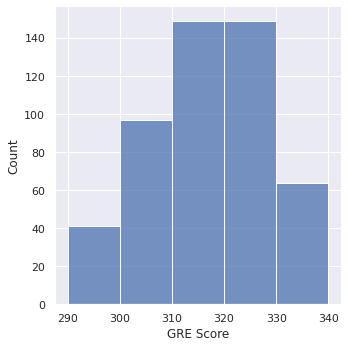

In [ ]:
set(rc={'figure.figsize':(11.7, 8.27)})

displot(rgr_data['GRE Score'], bins=5)

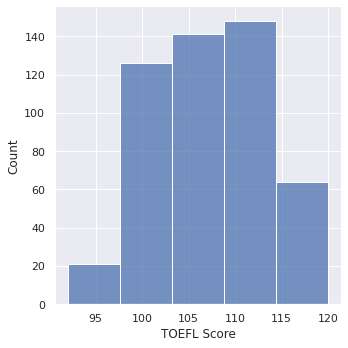

In [ ]:
set(rc={'figure.figsize':(11.7, 8.27)})

displot(rgr_data['TOEFL Score'], bins=5)

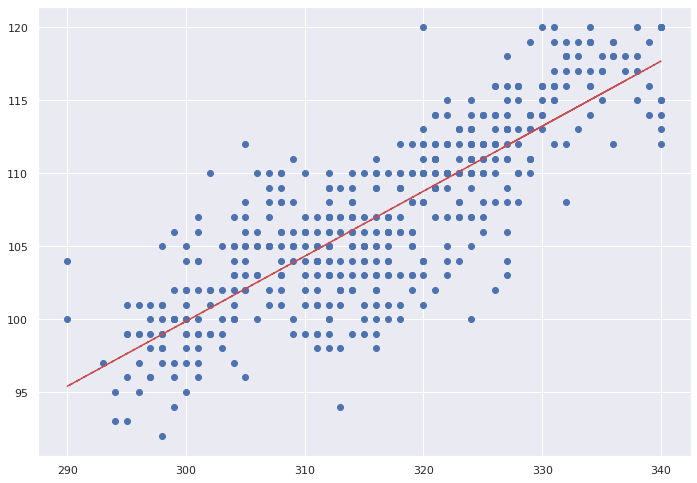

In [ ]:
plt.scatter(
    x=rgr_data['GRE Score'].values,
    y=rgr_data['TOEFL Score'].values)

helper = np.polyfit(
    rgr_data['GRE Score'],
    rgr_data['TOEFL Score'],
    1)

helper_1 = np.poly1d(helper)

plt.plot(
    rgr_data['GRE Score'],
    helper_1(rgr_data['GRE Score']),
    "r--")

plt.show()

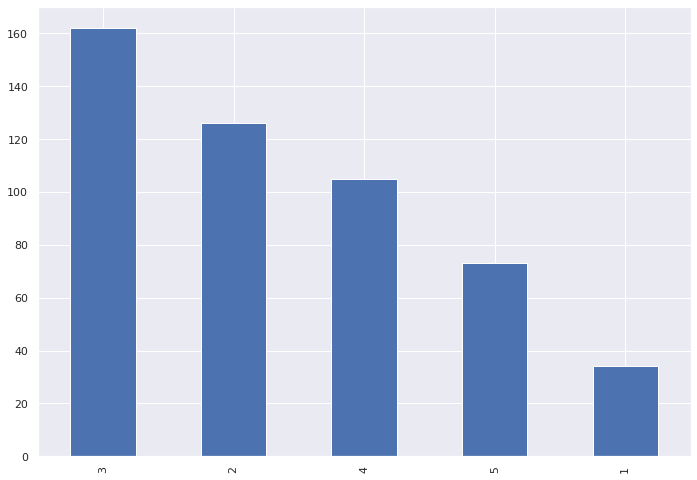

In [ ]:
rgr_data['University Rating'].value_counts().plot(kind='bar')

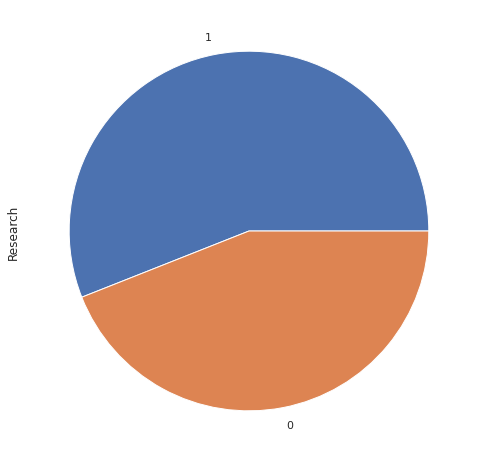

In [ ]:
rgr_data['Research'].value_counts().plot(kind='pie')

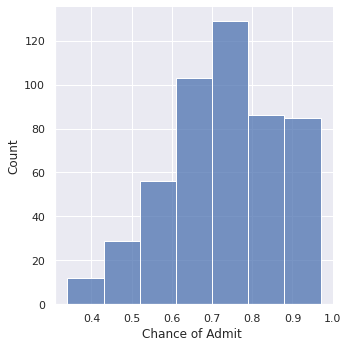

In [ ]:
set(rc={'figure.figsize':(11.7, 8.27)})

displot(rgr_data['Chance of Admit '], bins=7)

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64


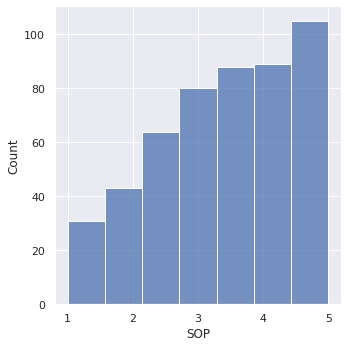

In [ ]:
print(rgr_data['SOP'].value_counts())

set(rc={'figure.figsize':(11.7, 8.27)})
displot(rgr_data['SOP'], bins=7)

3.0    99
4.0    94
3.5    86
4.5    63
5.0    50
2.5    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64


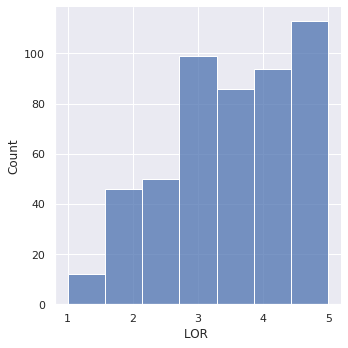

In [ ]:
print(rgr_data['LOR '].value_counts())

set(rc={'figure.figsize':(11.7, 8.27)})
displot(rgr_data['LOR '], bins=7)

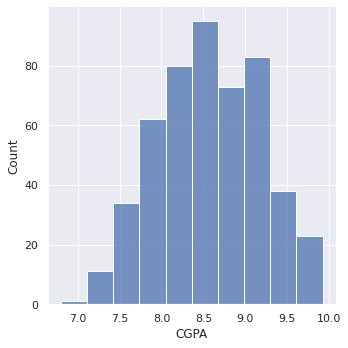

In [ ]:
set(rc={'figure.figsize':(11.7, 8.27)})
displot(rgr_data['CGPA'], bins=10)

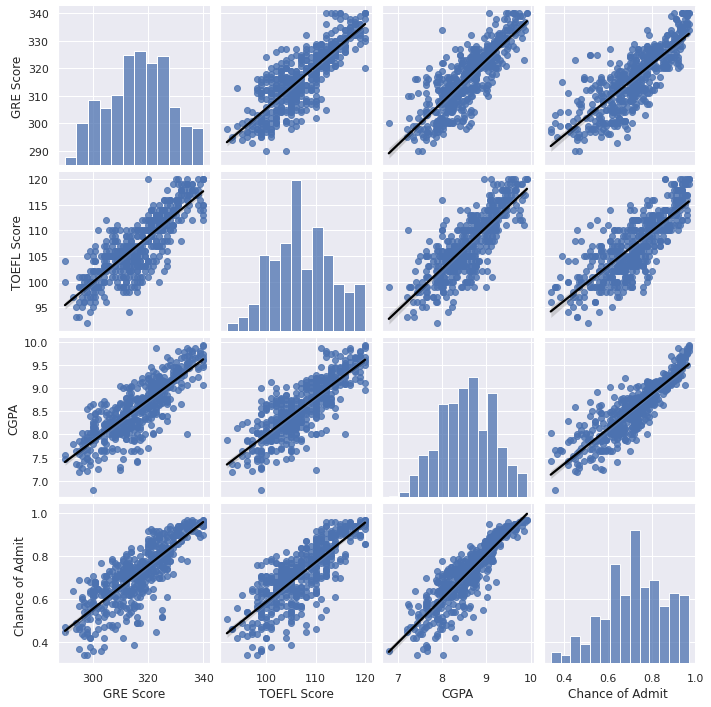

In [ ]:
pairplot(
    data = rgr_data.drop(columns=[
      "University Rating",
      "Research",
      "SOP",
      "LOR "]),
    kind='reg',
    plot_kws={'line_kws':{'color' : 'black'}})

## **2.4 Model Building**
<img src='https://1.bp.blogspot.com/-JibXONeGZxM/X-Hm_Hiyz8I/AAAAAAAACkw/ISRJdgOEBqgx2eSoiYlwdY2lA_YJNc1OACNcBGAsYHQ/w320-h76/rumus%2BMSE.jpg'>

In [ ]:
def manual_mse(y_true, y_pred) -> np.array:
  return np.sum(
      (np.array(y_true) - np.array(y_pred))**2/len(y_true))

In [ ]:
y_true = [1, 2, 3, 4, 5]
y_pred = [0.5, 2.4, 4, 3, 6]

In [ ]:
manual_mse(y_true, y_pred)

0.682

In [ ]:
mean_squared_error(y_true, y_pred)

0.682

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    rgr_data.drop(columns=['Chance of Admit '], axis=0),
    rgr_data['Chance of Admit '],
    test_size = 0.3)

In [ ]:
regressor = LinearRegression()

In [ ]:
# Train the model
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
hasil_prediksi = regressor.predict(x_test)

In [ ]:
print(manual_mse(y_test, hasil_prediksi))

0.004717445338784258


In [ ]:
print(mean_squared_error(y_test, hasil_prediksi))

0.004717445338784257


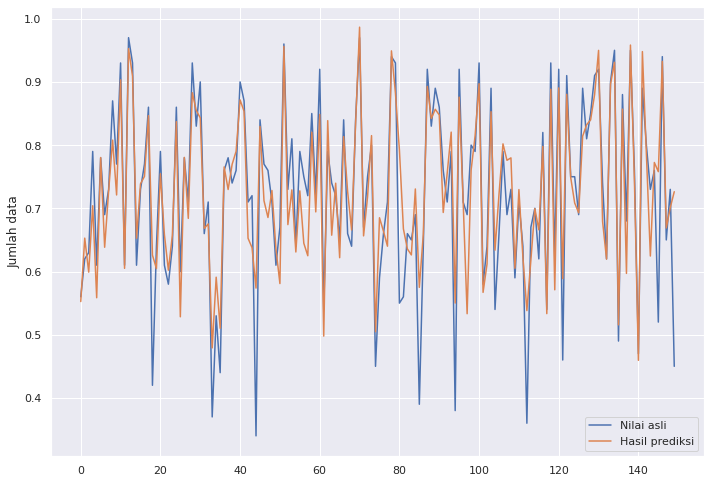

In [ ]:
plt.plot(list(y_test), label="Nilai asli")
plt.plot(list(hasil_prediksi), label="Hasil prediksi")

plt.legend(loc='lower right')
plt.ylabel('Jumlah data')

plt.show()

In [ ]:
from joblib import dump

dump(regressor, "model_admission.pkl")

['model_admission.pkl']

# **3. Model Deployment (?)**

In [ ]:
!pip install streamlit pyngrok

In [ ]:
import streamlit as st

from pyngrok import ngrok
from joblib import load

trained_model = load("/content/model_admission.pkl")

form = st.form(key='my-form')

gre = form.text_input("Masukkan nilai GRE: ")
toefl = form.text_input("Masukkan nilai toefl: ")
univ_rating = form.text_input("Masukkan nilai univ_rating: ")
sop = form.text_input("Masukkan nilai sop: ")
lor = form.text_input("Masukkan nilai lor: ")
cgpa = form.text_input("Masukkan nilai cgpa: ")
research = form.text_input("Masukkan nilai research: ")

submit = form.form_submit_button("Hitung tingkat kelulusan!")

if submit:
  hasil_akhir = trained_model.predict([[
    int(gre),
    int(toefl),
    int(univ_rating),
    float(sop),
    float(lor),
    float(cgpa),
    int(research)]])
  st.write("Hasil perhitungan:")
  st.write("Tingkat kelulusan", hasil_akhir[0]*100, "%")

ngrok_tunnel = ngrok.connect(8501)
print('Public URL:', ngrok_tunnel.public_url)

SyntaxError: ignored

In [8]:
!streamlit run masuk_kampus.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.196.27.27:8501

2021-10-17 08:04:28.354 Opening tunnel named: http-8501-4296696b-b9cb-4c47-8cfd-1b84edd2fe21
2021-10-17 08:04:28.386 t=2021-10-17T08:04:28+0000 lvl=info msg="no configuration paths supplied"
2021-10-17 08:04:28.387 t=2021-10-17T08:04:28+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2021-10-17 08:04:28.387 t=2021-10-17T08:04:28+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2021-10-17 08:04:28.391 t=2021-10-17T08:04:28+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-10-17 08:04:28.540 t=2021-10-17T08:04:28+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2021-10-17 08:04:28.541 t=2021-10-17T08:04:28+0000 lvl=info msg="client session established" obj=csess id=774c6ed0094b
2021-10-17 08:04:28.549 t=2021-10-17T08:04:28+0000 lvl=info msg=start p

In [ ]:
import streamlit as st

from pyngrok import ngrok
from joblib import load

trained_model = load("/content/model_sentimen.pkl")

form = st.form(key='my-form')

kalimat = form.text_input("Masukkan kalimat: ")

submit = form.form_submit_button("Cari tau sentimennya!")

if submit:
  hasil_akhir = trained_model.predict([kalimat])
  st.write("Kalimat tadi bersentimen", hasil_akhir[0])

ngrok_tunnel = ngrok.connect(8501)
print('Public URL:', ngrok_tunnel.public_url)

In [ ]:
!streamlit run sentimen.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.196.27.27:8501

2021-10-17 08:04:01.745 Opening tunnel named: http-8501-bc3a0e46-53aa-4d9f-a363-7aa2f687fa08
2021-10-17 08:04:01.781 t=2021-10-17T08:04:01+0000 lvl=info msg="no configuration paths supplied"
2021-10-17 08:04:01.782 t=2021-10-17T08:04:01+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2021-10-17 08:04:01.782 t=2021-10-17T08:04:01+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2021-10-17 08:04:01.785 t=2021-10-17T08:04:01+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-10-17 08:04:01.914 t=2021-10-17T08:04:01+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2021-10-17 08:04:01.914 t=2021-10-17T08:04:01+0000 lvl=info msg="client session established" obj=csess id=4c24c5bf7e02
2021-10-17 08:04:01.919 t=2021-10-17T08:04:01+0000 lvl=info msg=start p